In [47]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [275]:

data= pd.read_csv('data/CleanExpData.csv')


In [276]:

data.head()


,Unnamed: 0,ID,Cond,Sex,Age,Pol,Art01,Art02,Art03,Art04,...,Cor12,Cor13,Cor14,Cor15,Cor16,Cor17,Cor18,Cor19,Cor20,TotCor
0,0,A2BW6WD7LZ9EGV,T1,1.0,29.0,5.0,2.0,3.0,2.0,3.0,...,0,1,0,1,1,0,0,0,0,11
1,1,AXMPSUNKUBEIL,C,1.0,37.0,4.0,2.0,3.0,2.0,2.0,...,0,0,0,1,0,0,1,0,1,11
2,2,A2JP8W265WCC35,T1,2.0,49.0,5.0,1.0,2.0,2.0,2.0,...,1,0,0,0,1,0,1,1,0,13
3,3,A207IHY6GERCFO,C,1.0,36.0,1.0,2.0,4.0,3.0,3.0,...,0,0,0,0,0,0,0,1,0,6
4,4,A1V2H0UF94ATWY,C,1.0,59.0,4.0,5.0,3.0,2.0,2.0,...,1,1,0,0,0,1,1,0,0,12


In [21]:
data.columns

Index(['Unnamed: 0', 'ID', 'Cond', 'Sex', 'Age', 'Pol', 'Art01', 'Art02',
       'Art03', 'Art04', 'Art05', 'Art06', 'Art07', 'Art08', 'Art09', 'Art10',
       'Art11', 'Art12', 'Art13', 'Art14', 'Art15', 'Art16', 'Art17', 'Art18',
       'Art19', 'Art20', 'Cor01', 'Cor02', 'Cor03', 'Cor04', 'Cor05', 'Cor06',
       'Cor07', 'Cor08', 'Cor09', 'Cor10', 'Cor11', 'Cor12', 'Cor13', 'Cor14',
       'Cor15', 'Cor16', 'Cor17', 'Cor18', 'Cor19', 'Cor20', 'TotCor'],
      dtype='object')

In [22]:

data.shape

(291, 47)

In [65]:
responses = data.values[:,6:26]


In [97]:
responses= np.array(responses, dtype=int)

In [8]:
cor_labels = [2,2,2,2,2,2,2,2,1,1,1,3,3,3,4,4,4,5,5,5]


20

In [70]:
conf_total= np.zeros([5,5],dtype=int)
for i in responses:
    conf_i= confusion_matrix(cor_labels,list(i))
    #print(conf_i)
    conf_total= np.add(conf_total, conf_i)
print(conf_total)
    

[[578 138  50  25  82]
 [102 952 600 353 321]
 [ 19 112 298 256 188]
 [ 57 112 373 171 160]
 [ 20 129 157 250 317]]


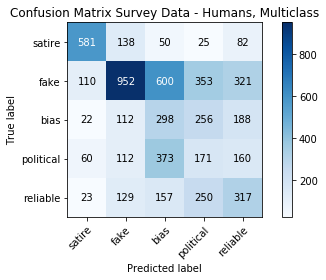

In [243]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
   # cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     #   print("Normalized confusion matrix")

    #print('')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['satire','fake','bias','political','reliable'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_total, classes=class_names,normalize=False,
                      title='Confusion Matrix Survey Data - Humans, Multiclass')



In [224]:
cor_labels_bin =[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0]
responses_bin = data.values[:,6:26]

for i in range(responses_bin.shape[1]):
    for j in range(responses_bin.shape[0]):
        if responses_bin[j,i] in ([1,2,3,4]):
            responses_bin[j,i]= 1  
        else:
            responses_bin[j,i]= 0

conf_total_bin= np.zeros([2,2],dtype=int)
for i in responses_bin:
    conf_i= confusion_matrix(cor_labels_bin,list(i))
    #print(conf_i)
    conf_total_bin= np.add(conf_total_bin, conf_i)
print(conf_total_bin)
    

[[ 317  556]
 [ 751 4196]]


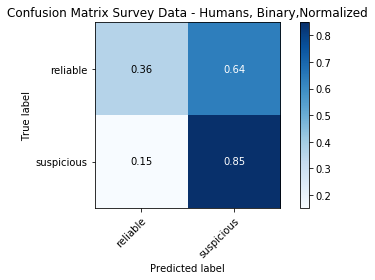

In [245]:
class_names = np.array(['reliable','suspicious'])
# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_total_bin, classes=class_names,normalize=True,
                      title='Confusion Matrix Survey Data - Humans, Binary,Normalized')

In [226]:
survey_articles = pd.read_csv('data/survey_articles.csv')
survey_articles.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,208,208,208,245,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,Alabama declares flu outbreak emergency as vac...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Alabama declares flu outbreak emergency as vac...,NaN,NaN,[''],NaN,"vaccine failure, influenza, Heavy metals, Flu ...",NaN,NaN
1,426,426,426,495,conservativefighters.com,fake,http://conservativefighters.com/news/8-years-o...,Despite the claim of Iranian Revolutionary Gua...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"After 8 Years with Obama, Iran Protesters Reve...",NaN,NaN,[''],NaN,News,NaN,NaN
2,5986,5986,5986,6840,thecommonsenseshow.com,fake,http://www.thecommonsenseshow.com/2018/01/24/g...,"Google, Facebook, Twitter and Communist China ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Google, Facebook, Twitter and Communist China ...",Dave Hodges,NaN,[''],NaN,NaN,NaN,NaN
3,27599,27599,7599,30264,newswithviews.com,fake,http://www.newswithviews.com/Smith/jeffrey125.htm,DOCTORS WARN: AVOID GENETICALLY MODIFIED FOODS...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Jeffrey Smith -- Doctors Warn: Avoid Genetical...,NaN,NaN,[''],NaN,NaN,NaN,NaN
4,31198,31198,1198,35324,vigilantcitizen.com,fake,https://vigilantcitizen.com/latestnews/amanda-...,\n\n\n\n\n\n\n\n\n\n\n\n\n\nAmanda Bynes poste...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Amanda Bynes Tweets About Father’s Abuse and M...,"Lucy Cohen, Birth Son, Alex Jones, Many In The...",NaN,[''],Amanda Bynes posted a series of tweets about h...,"breakdown, amanda bynes",NaN,NaN


In [227]:
#fake as reliable 

reliable = 5 
pos = range(8)
values = np.zeros([8,], dtype=int)
dict_fake = dict(zip(pos,values))

fake_0=[]

for i in range(len(responses)):
    if reliable in responses[i][0:8]:
        for j in range(8):
            if responses[i][j]== reliable:
                dict_fake[j]+=1
                if j== 0:
                    fake_0.append(i)
    

In [228]:
print(dict_fake)

{0: 107, 1: 23, 2: 18, 3: 67, 4: 28, 5: 45, 6: 18, 7: 15}


In [235]:
survey_articles.content[0]

'Alabama declares flu outbreak emergency as vaccine failure becomes obvious to everyone\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nAlabama declares flu outbreak emergency as vaccine failure becomes obvious to everyone\n\nTuesday, January 16, 2018 by: Isabelle Z.\n\nTags: Alabama, badhealth, badmedicine, flu outbreak, Flu shots, Flu vaccine, Heavy metals, influenza, junk science, mercury, prevent flu, vaccine failure\n\n0VIEWS\n\n(Natural News) A State Public Health Emergency has been issued in Alabama by Governor Kay Ivey as a flu outbreak grips the state. Schools are closing and hospitals are filling up as the flu vaccine proves to be a spectacular failure yet again this year.\n\nHospital emergency rooms and outpatient clinics are reporting a very high volume of patients. Children’s of Alabama has issued a diversion protocol as they’ve run out of beds, instead requesting that pat

In [240]:
#reliable as fake 

fake = 2 
pos = [17,18,19]
values = np.zeros([3,], dtype=int)
dict_fake = dict(zip(pos,values))


for i in range(len(responses)):
    if reliable in responses[i][17:20]:
        for j in [17,18,19]:
            if responses[i][j]== fake:
                dict_fake[j]+=1

In [241]:
print(dict_fake)

{17: 25, 18: 12, 19: 17}


In [234]:
survey_articles.content[17]

'The announcement came on Saturday. Just three days before the Alabama special election that transfixed the nation, and on the same day that President Trump fact-checked the Washington Post’s Dave Weigel, Iraq’s prime minister declared victory in the war against ISIS. Iraq — with indispensable American help — has regained control of its cities and its border with Syria. ISIS has been reduced to a shadow of its former self.\n\nThe victory isn’t confined to Iraq. American-allied forces control ISIS’s former capital in Syria, and the world’s largest jihadist army is gone. Bands of insurgents still prowl the countryside, and ISIS cells exist across the world, but the war against the “caliphate” is over. It’s been won.\n\nSo why does no one seem to care?\n\nIt was exactly three years ago that the Middle East was in crisis. The ISIS blitzkrieg had brought Iraq to its knees. Jihadists controlled immense sections of Iraq and Syria. Abu Bakr al-Baghdadi spoke from Mosul’s Great Mosque, declared

In [161]:
#  satire as reliable

reliable = 5
pos = [8,9,10]
values = np.zeros([3,], dtype=int)
dict_fake = dict(zip(pos,values))


for i in range(len(responses)):
    if reliable in responses[i][8:11]:
        for j in [8,9,10]:
            if responses[i][j]== reliable :
                dict_fake[j]+=1
          

In [162]:
print(dict_fake)

{8: 17, 9: 35, 10: 30}


In [233]:
survey_articles.content[10]

"Lila Rose, president of the pro-life group Live Action, says President Trump is off to a “promising” start on pro-life issues, but she says the president and Congress must do what it takes to defund Planned Parenthood at a time when Democrats are voting in favor of “infanticide.”\n\nStill in her 20s, Rose has been a leading pro-life activist for a decade, starting when she was 15. She gained notoriety for videotaping her experiences posing as a pregnant teenager at various Planned Parenthood facilities.\n\nOne year into the Trump presidency and 45 years since the Supreme Court legalized abortion, Rose gives the administration a decent grade on pro-life issues.\n\n“I think the last year has been promising. I would use that word, especially the folks that he’s surrounded himself with, and the appointments he’s made, and the confirming of Justice Gorsuch. These are good signs,” said Rose.\n\n“I think it’s good that he showed up to speak from the Rose Garden at the March for Life. I think

In [277]:
data.columns


Index(['Unnamed: 0', 'ID', 'Cond', 'Sex', 'Age', 'Pol', 'Art01', 'Art02',
       'Art03', 'Art04', 'Art05', 'Art06', 'Art07', 'Art08', 'Art09', 'Art10',
       'Art11', 'Art12', 'Art13', 'Art14', 'Art15', 'Art16', 'Art17', 'Art18',
       'Art19', 'Art20', 'Cor01', 'Cor02', 'Cor03', 'Cor04', 'Cor05', 'Cor06',
       'Cor07', 'Cor08', 'Cor09', 'Cor10', 'Cor11', 'Cor12', 'Cor13', 'Cor14',
       'Cor15', 'Cor16', 'Cor17', 'Cor18', 'Cor19', 'Cor20', 'TotCor'],
      dtype='object')

In [305]:


data_2=pd.melt(data, ['ID', 'Cond', 'Sex', 'Age', 'Pol','TotCor'], ['Cor01', 'Cor02', 'Cor03', 'Cor04', 'Cor05', 'Cor06',
       'Cor07', 'Cor08', 'Cor09', 'Cor10', 'Cor11', 'Cor12', 'Cor13', 'Cor14',
       'Cor15', 'Cor16', 'Cor17', 'Cor18', 'Cor19', 'Cor20'])
    

In [306]:
data_2.shape


(5820, 8)

In [307]:
data_2.head()


,ID,Cond,Sex,Age,Pol,TotCor,variable,value
0,A2BW6WD7LZ9EGV,T1,1.0,29.0,5.0,11,Cor01,1
1,AXMPSUNKUBEIL,C,1.0,37.0,4.0,11,Cor01,1
2,A2JP8W265WCC35,T1,2.0,49.0,5.0,13,Cor01,0
3,A207IHY6GERCFO,C,1.0,36.0,1.0,6,Cor01,1
4,A1V2H0UF94ATWY,C,1.0,59.0,4.0,12,Cor01,0


In [308]:

data_2.loc[data_2['variable'].isin (['Cor01','Cor02','Cor03','Cor04','Cor05','Cor06','Cor07','Cor08']),'type'] = 'fake'
data_2.loc[data_2['variable'].isin (['Cor09','Cor10','Cor11']),'type'] = 'satire'
data_2.loc[data_2['variable'].isin (['Cor12','Cor13','Cor14']),'type'] = 'bias'
data_2.loc[data_2['variable'].isin (['Cor15','Cor16','Cor17']),'type'] = 'political'
data_2.loc[data_2['variable'].isin (['Cor18','Cor19','Cor20']),'type'] = 'reliable'

In [309]:
data_2.loc[data_2['Sex']==1,'Sex'] = 'male'
data_2.loc[data_2['Sex']==2,'Sex'] = 'female'
data_2.loc[data_2['Sex']==3,'Sex'] = 'Other / No Answer'


In [310]:
data_2.loc[data_2['Cond']=='T1','Cond'] = 'Training Game'
data_2.loc[data_2['Cond']=='T2','Cond'] = 'Training Video'
data_2.loc[data_2['Cond']=='C','Cond'] = 'Control'


In [311]:
data_2.loc[data_2['Pol']==1,'Pol'] = 'Very Conservative'
data_2.loc[data_2['Pol']==2,'Pol'] = 'Somewhat conservative'
data_2.loc[data_2['Pol']==3,'Pol'] = 'Middle of the road'
data_2.loc[data_2['Pol']==4,'Pol'] = 'Somewhat liberal'
data_2.loc[data_2['Pol']==5,'Pol'] = 'Very liberal'
data_2.loc[data_2['Pol']==6,'Pol'] = 'I do not have a political affiliatione'
data_2.loc[data_2['Pol']==7,'Pol'] = 'I prefer not to answer'


In [312]:
ages_18_24=list(range(25))[18:25]
ages_25_34=list(range(35))[25:35]
ages_35_49=list(range(50))[35:50]
ages_50_plus=list(range(100))[51:100]
print(ages)
data_2.loc[data_2['Age']<18,'AgeGroup'] = ' Under 18'
data_2.loc[data_2['Age'].isin (ages_18_24),'AgeGroup'] = '18 to 24'
data_2.loc[data_2['Age'].isin (ages_25_34),'AgeGroup'] = '25 to 34'
data_2.loc[data_2['Age'].isin (ages_35_49),'AgeGroup'] = '35 to 49'
data_2.loc[data_2['Age'].isin (ages_50_plus),'AgeGroup'] = '50 and over'

[18, 19, 20, 21, 22, 23, 24]


In [313]:
data_2.head()

,ID,Cond,Sex,Age,Pol,TotCor,variable,value,type,AgeGroup
0,A2BW6WD7LZ9EGV,Training Game,male,29.0,Very liberal,11,Cor01,1,fake,25 to 34
1,AXMPSUNKUBEIL,Control,male,37.0,Somewhat liberal,11,Cor01,1,fake,35 to 49
2,A2JP8W265WCC35,Training Game,female,49.0,Very liberal,13,Cor01,0,fake,35 to 49
3,A207IHY6GERCFO,Control,male,36.0,Very Conservative,6,Cor01,1,fake,35 to 49
4,A1V2H0UF94ATWY,Control,male,59.0,Somewhat liberal,12,Cor01,0,fake,50 and over


In [314]:
data_2.to_csv('data/Survey_Humans.csv')